In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack, kron, eye, csc_matrix, block_diag
from MC_Datagen import make_grids, print_grid_stab, print_grid_qubits, generate_error



In [9]:
random_seed = 42

L = 5
x_stab, z_stab, x_qubits, z_qubits = make_grids(L)
x_stab, z_stab, x_qubits, z_qubits = generate_error(x_stab, z_stab, x_qubits, z_qubits, 0.05)

In [10]:
syndrome = np.array(x_stab)
noise = np.array(x_qubits)

print(syndrome)
print(noise)


[[0 0 1 1 0]
 [0 0 0 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


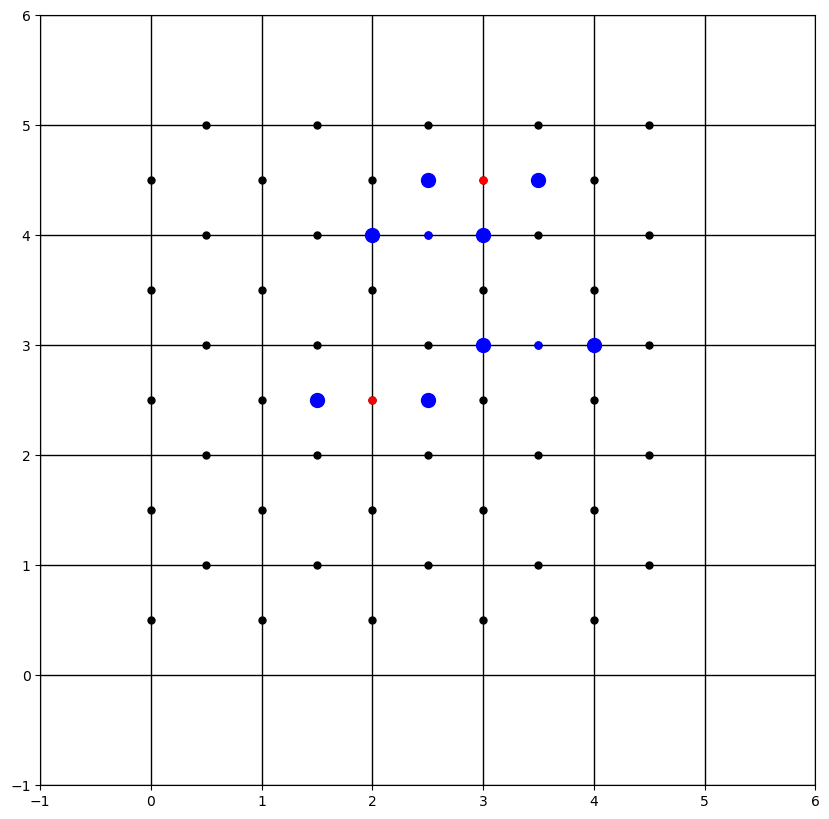

In [11]:
def pp_code(syndrome, noise):
    L = noise.shape[0]/2
    # initialize empty plot
    fig, ax = plt.subplots(figsize=(2*L,2*L))
    # set bounds for image
    ax.set_xlim(-1, L+1)
    ax.set_ylim(-1, L+1)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    # remove gridlines to the left of x = 0
    for down, row in enumerate(noise): # AWFUL AWFUL COORDINATE SYSTEM
        for right, bit in enumerate(row):
            print(f"down: {down}, right: {right}, bit: {bit}")
            if down%2 == 0:
                ax.plot(right+0.5, L-(down*0.5), marker='o', color='k', markersize=5)
                if bit == 1:
                    ax.plot(right+0.5, L-(down*0.5), marker='o', color='r', markersize=5)
            else:
                ax.plot(right, L-(down*0.5), marker='o', color='k', markersize=5)
                if bit == 1:
                    ax.plot(right, L-(down*0.5), marker='o', color='r', markersize=5)
    print("drawing errors")
    for down, row in enumerate(syndrome):
        for right, bit in enumerate(row):
            print(f"down: {down}, right: {right}, bit: {bit}")
            if bit == 1:
                ax.plot(right+0.5, L-(down+0.5), marker='o', color='b', markersize=10)

    plt.show()

def pp_code(x_stab, z_stab, x_qubits, z_qubits):
    L = x_qubits.shape[0]/2
    # initialize empty plot
    fig, ax = plt.subplots(figsize=(2*L,2*L))
    # set bounds for image
    ax.set_xlim(-1, L+1)
    ax.set_ylim(-1, L+1)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    # remove gridlines to the left of x = 0
    for down, row in enumerate(x_qubits): # AWFUL AWFUL COORDINATE SYSTEM
        for right, bit in enumerate(row):
            #print(f"down: {down}, right: {right}, bit: {bit}")
            if down%2 == 0:
                ax.plot(right+0.5, L-(down*0.5), marker='o', color='k', markersize=5)
                if bit == 1:
                    ax.plot(right+0.5, L-(down*0.5), marker='o', color='r', markersize=5)
                elif z_qubits[down][right] == 1:
                    ax.plot(right+0.5, L-(down*0.5), marker='o', color='b', markersize=5)
                if z_qubits[down][right] == 1 and bit == 1:
                    ax.plot(right+0.5, L-(down*0.5), marker='o', color='g', markersize=5)
            else:
                ax.plot(right, L-(down*0.5), marker='o', color='k', markersize=5)
                if bit == 1:
                    ax.plot(right, L-(down*0.5), marker='o', color='r', markersize=5)
                elif z_qubits[down][right] == 1:
                    ax.plot(right, L-(down*0.5), marker='o', color='b', markersize=5)
                if z_qubits[down][right] == 1 and bit == 1:
                    ax.plot(right, L-(down*0.5), marker='o', color='g', markersize=5)
    #print("drawing errors")
    for down, row in enumerate(x_stab):
        for right, bit in enumerate(row):
            #print(f"down: {down}, right: {right}, bit: {bit}")
            if bit == 1:
                ax.plot(right+0.5, L-(down+0.5), marker='o', color='b', markersize=10)
    for down, row in enumerate(z_stab):
        for right, bit in enumerate(row):
            #print(f"down: {down}, right: {right}, bit: {bit}")
            if bit == 1:
                ax.plot((right + 0)% 5, L-((down+0) %5 ), marker='o', color='b', markersize=10)

    plt.show()
    





pp_code(x_stab, z_stab, x_qubits, z_qubits)


In [12]:
dataset = np.load("datasets/MC_data_5_14.npy")
print(dataset.shape)

(10000, 75)


In [13]:
observation = dataset[2]

syndrome = observation[:25].reshape(5,5)
noise = observation[25:].reshape(10,5)

print(syndrome), print(noise)

[[0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [1 0 0 0 0]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]


(None, None)

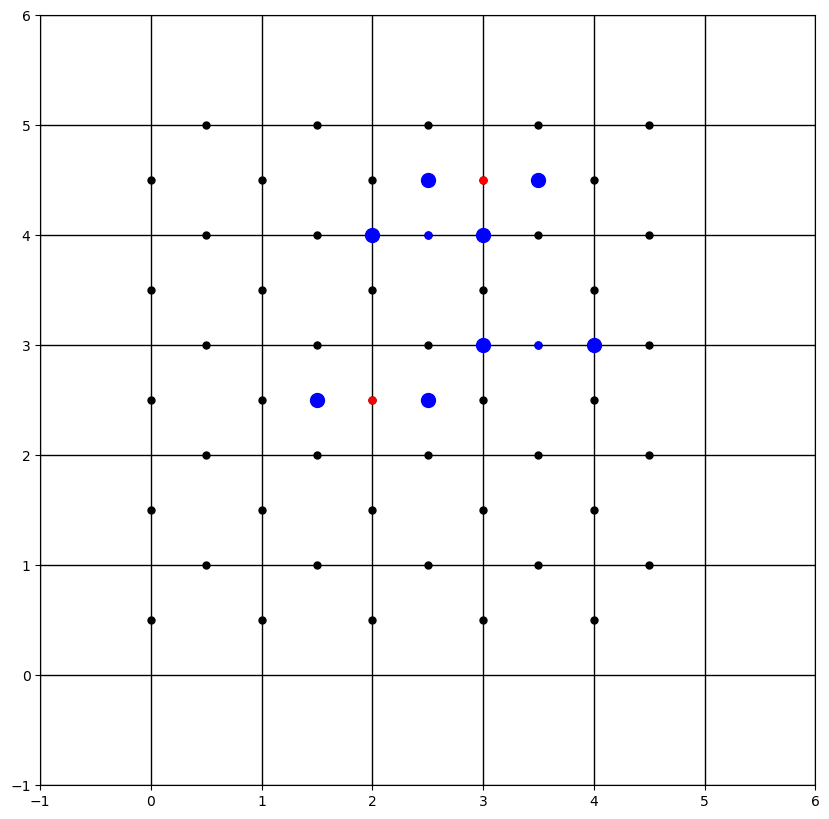

In [14]:
pp_code(x_stab, z_stab, x_qubits, z_qubits)